<a href="https://colab.research.google.com/github/umair594/100-Prediction-Models-/blob/main/Polynomial_Regression_Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Polynomial Regression – Modeling Nonlinear Trends**

**Objective**

The goal of this project is to model nonlinear relationships between a predictor (independent variable) and a target (dependent variable) using Polynomial Regression.

Polynomial Regression extends linear regression by adding polynomial terms (x², x³, etc.) to capture curvature in the data.

# **Step 1: Import Libraries**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# **Step 2: Generate or Load Data**

We’ll generate synthetic data to demonstrate a clear nonlinear trend:

In [17]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + X + np.random.randn(100, 1) * 3  # Cubic relationship with noise

# Convert to DataFrame for convenience
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# **Step 3: Visualize the Data**

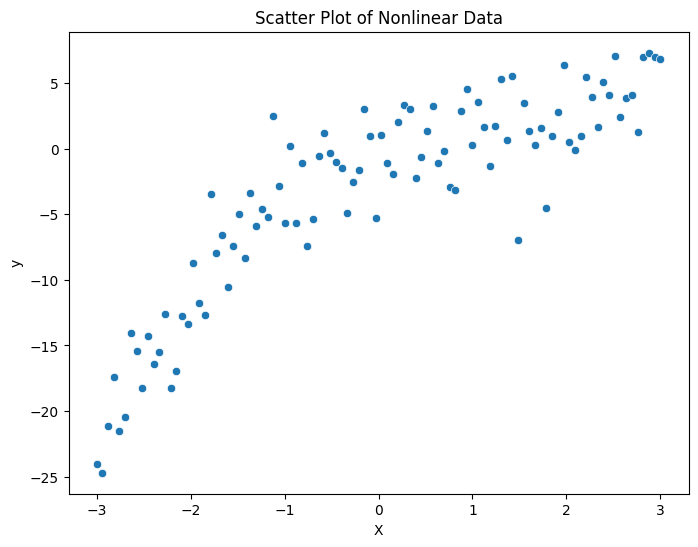

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='X', y='y', data=data)
plt.title("Scatter Plot of Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**Explanation:**

>The scatter plot shows that the relationship between X and y is nonlinear (cubic-like trend). A straight line (linear regression) will likely underfit this data.

# **Step 4: Split the Data**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 5: Fit a Linear Regression Model (Baseline)**

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))

Linear Regression:
R2 Score: 0.7207053474554126
MSE: 19.168538609006664


**Observation:**

>R² is expected to be low because linear regression cannot capture the curvature.

>We need polynomial terms to improve the fit.

# **Step 6: Fit a Polynomial Regression Model**

In [21]:
# Transform features to polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
print("\nPolynomial Regression (Degree 3):")
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression (Degree 3):
R2 Score: 0.9210247720325343
MSE: 5.420224457064374


# **Step 7: Visualize Polynomial Regression Fit**

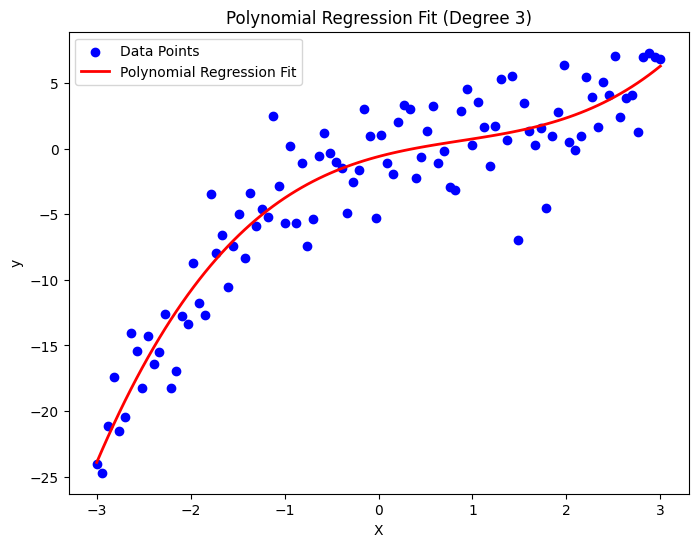

In [22]:
# Generate smooth curve for plotting
X_curve = np.linspace(-3, 3, 100).reshape(-1, 1)
y_curve = poly_model.predict(poly.transform(X_curve))

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Regression Fit', linewidth=2)
plt.title("Polynomial Regression Fit (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Explanation:**

>The red curve follows the nonlinear pattern of the data.

>Polynomial Regression can capture the cubic trend, significantly improving R² compared to linear regression.

# **Step 8: Try Different Polynomial Degrees**

In [23]:
for degree in [2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    print(f"Degree {degree} -> R2 Score: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")

Degree 2 -> R2 Score: 0.8719, MSE: 8.7901
Degree 3 -> R2 Score: 0.9210, MSE: 5.4202
Degree 4 -> R2 Score: 0.9167, MSE: 5.7139
Degree 5 -> R2 Score: 0.9149, MSE: 5.8421


**Observation:**

>Increasing degree may improve fit, but too high a degree can overfit.

>Degree 3–4 often works well for cubic-like trends.

# **Step 9: Summary and Conclusion**

>Linear Regression is insufficient for nonlinear relationships.

>Polynomial Regression captures nonlinearity by adding polynomial features.

>Model selection involves choosing the appropriate polynomial degree to avoid underfitting or overfitting.

>Visualization confirms the model accurately captures the trend.

# **Optional Extension**

>Use cross-validation to select the best polynomial degree automatically.

>Compare with regularization (Ridge, Lasso) to prevent overfitting for high-degree polynomials.